# Analyse Exploratoire

### Import des modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')


### Analyse Exploratoire

In [4]:
building_consumption = pd.read_csv('2016_Building_Energy_Benchmarking.csv')
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [5]:
# On regarde comment un batiment est défini dans ce jeu de données
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [6]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [7]:
building_consumption.head()
data = building_consumption

# pour les variables en entrée pour la modélisation, tu peux garder :
# ['BuildingType', 'PrimaryPropertyType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'PrimaryPropertyTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'YearBuilt',
# 'NumberofBuildings', 'Latitude', 'Longitude', 'NumberofFloors','PropertyGFATotal','PropertyGFAParking']

# et pour les variables à prédire : ['TotalGHGEmissions', 'SiteEnergyUse(kBtu)']

variable = ['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'YearBuilt',
'NumberofBuildings', 'Latitude', 'Longitude','SiteEnergyUse(kBtu)', 'NumberofFloors','PropertyGFATotal','PropertyGFAParking','SiteEUI(kBtu/sf)','TotalGHGEmissions','GHGEmissionsIntensity']

data = building_consumption[variable]
data.head()


,BuildingType,PrimaryPropertyType,LargestPropertyUseType,LargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearBuilt,NumberofBuildings,Latitude,Longitude,SiteEnergyUse(kBtu),NumberofFloors,PropertyGFATotal,PropertyGFAParking,SiteEUI(kBtu/sf),TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,1927,1.0,47.61220,-122.33799,7226362.5,12,88434,0,81.699997,249.98,2.83
1,NonResidential,Hotel,Hotel,83880.0,4622.0,15064.0,Parking,Restaurant,1996,1.0,47.61317,-122.33393,8387933.0,11,103566,15064,94.800003,295.86,2.86
2,NonResidential,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,1969,1.0,47.61393,-122.33810,72587024.0,41,956110,196718,96.000000,2089.28,2.19
3,NonResidential,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,1926,1.0,47.61412,-122.33664,6794584.0,10,61320,0,110.800003,286.43,4.67
4,NonResidential,Hotel,Hotel,123445.0,0.0,68009.0,Parking,Swimming Pool,1980,1.0,47.61375,-122.34047,14172606.0,18,175580,62000,114.800003,505.01,2.88


#### TERMINER L'ANALYSE EXPLORATOIRE

A réaliser :
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse :

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet.

# Modélisation

### Import des modules

In [19]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes.

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

In [25]:
data[(data['SiteEnergyUse(kBtu)'] == 0) & (data['SiteEUI(kBtu/sf)'] == 0)].shape

(16, 19)

In [27]:
data[(data['SiteEnergyUse(kBtu)'] == 0) & (data['SiteEUI(kBtu/sf)'] == 0)].BuildingType.value_counts(dropna = False)

BuildingType
SPS-District K-12       14
NonResidential           1
Multifamily LR (1-4)     1
Name: count, dtype: int64

In [29]:
data[(data['TotalGHGEmissions'] == 0) & (data['GHGEmissionsIntensity'] == 0)].shape

(9, 19)

In [31]:
data[(data['TotalGHGEmissions'] == 0) & (data['GHGEmissionsIntensity'] == 0)].BuildingType.value_counts(dropna = False)

BuildingType
SPS-District K-12       3
NonResidential          3
Multifamily LR (1-4)    3
Name: count, dtype: int64

Text(0.5, 1.0, 'totalEmissionsSiteEnergyUse')

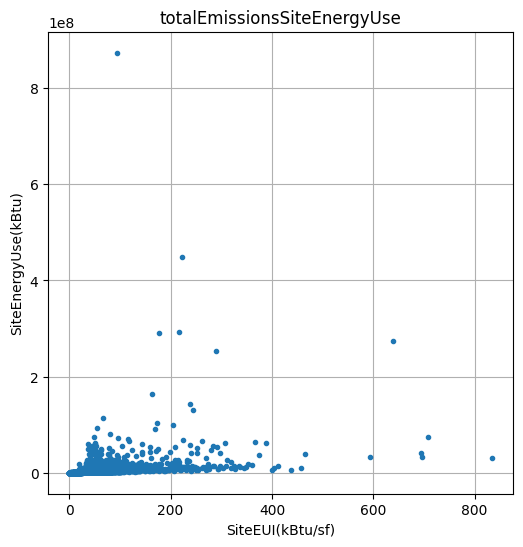

In [33]:
fig = plt.figure(figsize=(6, 6))
plt.plot(data['SiteEUI(kBtu/sf)'], data['SiteEnergyUse(kBtu)'], '.')
plt.grid()
plt.xlabel('SiteEUI(kBtu/sf)')
plt.ylabel('SiteEnergyUse(kBtu)')
plt.title('totalEmissionsSiteEnergyUse')

In [35]:
data = data[(data['SiteEnergyUse(kBtu)'] < 1e8) & (data['SiteEUI(kBtu/sf)'] < 1e6)].copy()
data.shape[0]

3358

Text(0.5, 1.0, 'totalEmissionsSiteEnergyUse')

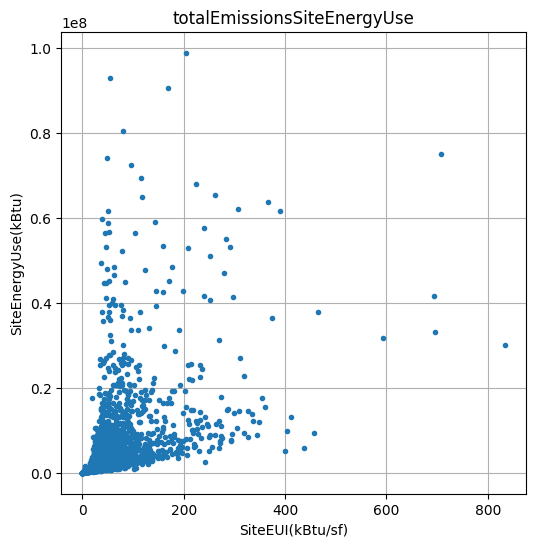

In [37]:
fig = plt.figure(figsize=(6, 6))
plt.plot(data['SiteEUI(kBtu/sf)'], data['SiteEnergyUse(kBtu)'], '.')
plt.grid()
plt.xlabel('SiteEUI(kBtu/sf)')
plt.ylabel('SiteEnergyUse(kBtu)')
plt.title('totalEmissionsSiteEnergyUse')

Text(0.5, 1.0, 'totalEmissionsSiteEnergyUse')

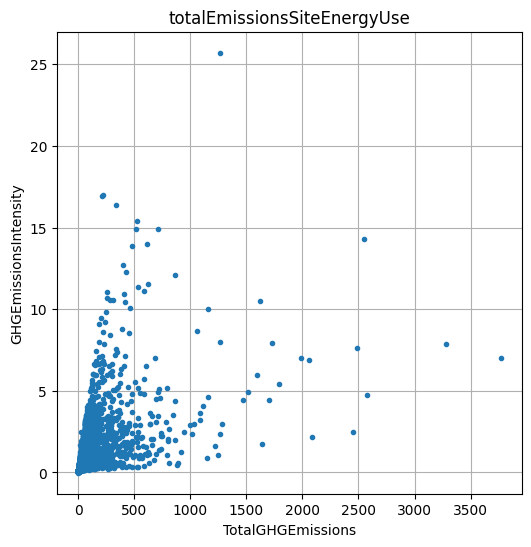

In [39]:
fig = plt.figure(figsize=(6, 6))
plt.plot(data['TotalGHGEmissions'], data['GHGEmissionsIntensity'], '.')
plt.grid()
plt.xlabel('TotalGHGEmissions')
plt.ylabel('GHGEmissionsIntensity')
plt.title('totalEmissionsSiteEnergyUse')

In [41]:
data = data[(data['TotalGHGEmissions'] < 1e3) & (data['GHGEmissionsIntensity'] < 1e4)].copy()
data.shape[0]

3321

Text(0.5, 1.0, 'totalEmissionsSiteEnergyUse')

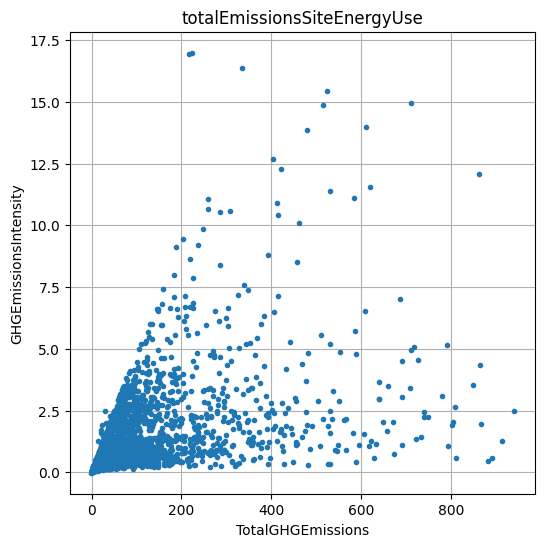

In [43]:
fig = plt.figure(figsize=(6, 6))
plt.plot(data['TotalGHGEmissions'], data['GHGEmissionsIntensity'], '.')
plt.grid()
plt.xlabel('TotalGHGEmissions')
plt.ylabel('GHGEmissionsIntensity')
plt.title('totalEmissionsSiteEnergyUse')

In [45]:
nonres_types = [
    'NonResidential',
    'Nonresidential COS',
    'SPS-District K-12',
    'Nonresidential WA'
]
nonres_data = data.loc[data['BuildingType'].isin(nonres_types)].copy()

nonres_data.head()
df = nonres_data

In [47]:
df.PrimaryPropertyType.unique()


array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Residence Hall', 'Distribution Center', 'Worship Facility',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Hospital', 'Office'], dtype=object)

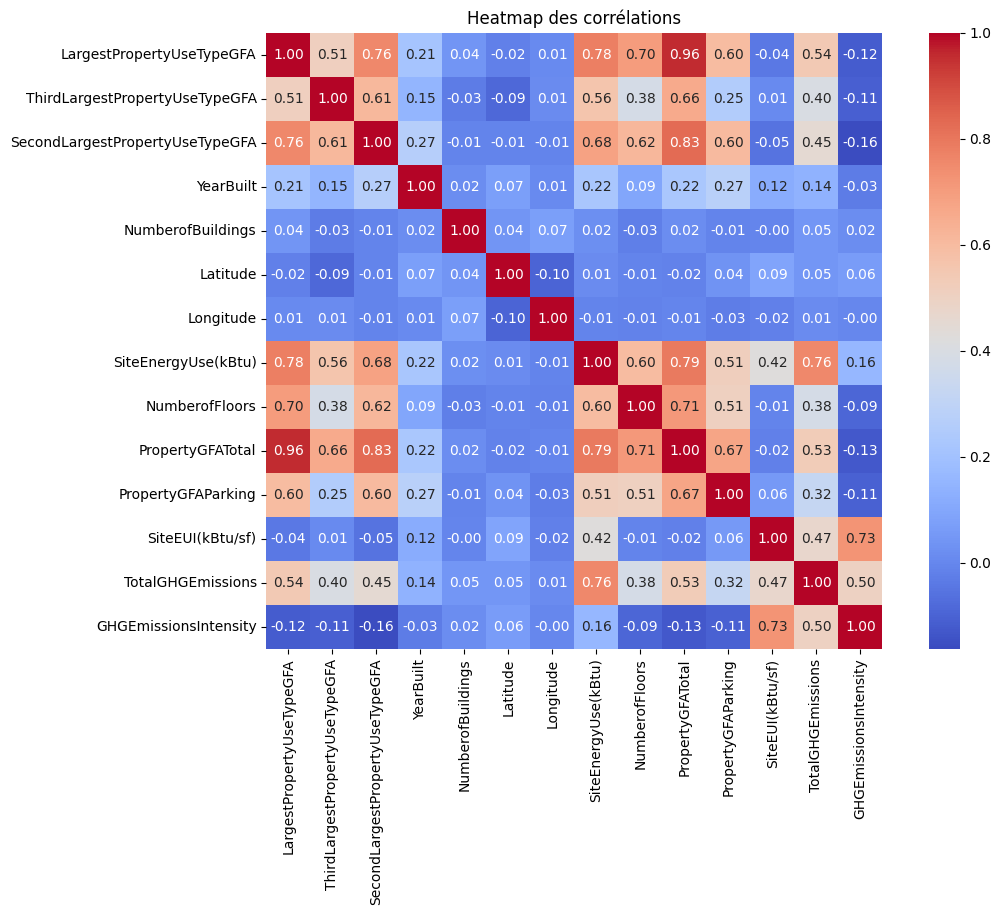

In [49]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[num_cols].corr(method='pearson')
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Heatmap des corrélations")
plt.show()

In [51]:
df.BuildingType.value_counts()

BuildingType
NonResidential        1421
SPS-District K-12       98
Nonresidential COS      85
Nonresidential WA        1
Name: count, dtype: int64

In [53]:
df.PrimaryPropertyType.value_counts()

PrimaryPropertyType
Small- and Mid-Sized Office    291
Other                          235
Warehouse                      187
Large Office                   171
K-12 School                    135
Mixed Use Property             105
Retail Store                    91
Worship Facility                71
Hotel                           69
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  37
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           19
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Laboratory                       6
Office                           3
Low-Rise Multifamily             2
Hospital                         1
Name: count, dtype: int64

In [56]:
df.columns

Index(['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType', 'YearBuilt', 'NumberofBuildings',
       'Latitude', 'Longitude', 'SiteEnergyUse(kBtu)', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'SiteEUI(kBtu/sf)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [58]:
df = df[
    (df['NumberofFloors'] > 0) &
    (df['NumberofFloors'] < 60) &
    (df['PropertyGFATotal'] > 0) &
    (df['PropertyGFATotal'] < 1e6)
].copy()

Text(0.5, 1.0, 'gfaPerNumberofFloors')

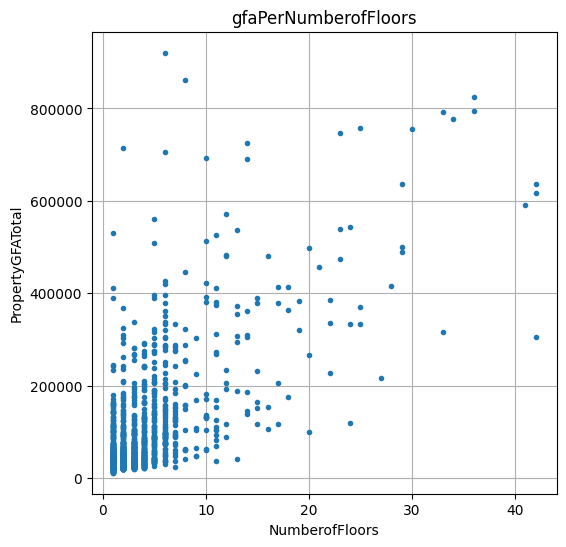

In [60]:
fig = plt.figure(figsize=(6, 6))
plt.plot(df['NumberofFloors'], df['PropertyGFATotal'], '.')
plt.grid()

plt.xlabel('NumberofFloors')
plt.ylabel('PropertyGFATotal')
plt.title('gfaPerNumberofFloors')

In [62]:
df['GFA_per_Floor'] = df['PropertyGFATotal'] / df['NumberofFloors']


In [64]:
df['GFA_less_parking'] = df['PropertyGFATotal'] - df['PropertyGFAParking']

In [66]:
df = df[(df['GFA_per_Floor'] < 1e5)]

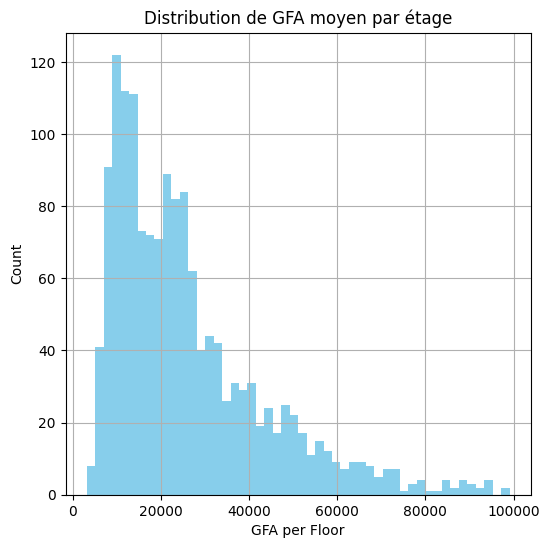

In [68]:
plt.figure(figsize=(6, 6))
plt.hist(df['GFA_per_Floor'], bins=50, color='skyblue')
plt.xlabel('GFA per Floor')
plt.ylabel('Count')
plt.title('Distribution de GFA moyen par étage')
plt.grid()
plt.show()

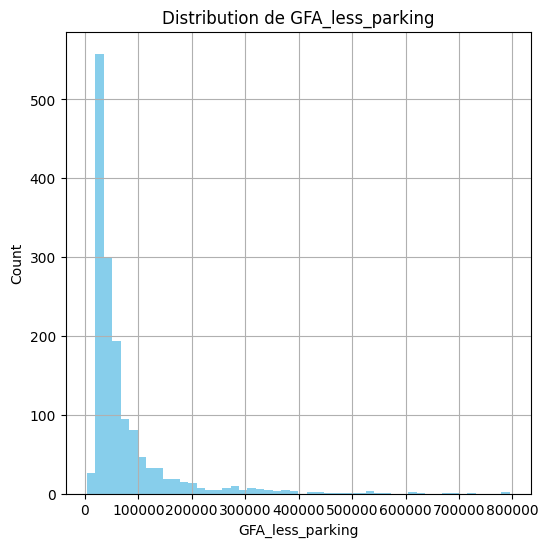

In [70]:
plt.figure(figsize=(6, 6))
plt.hist(df['GFA_less_parking'], bins=50, color='skyblue')
plt.xlabel('GFA_less_parking')
plt.ylabel('Count')
plt.title('Distribution de GFA_less_parking')
plt.grid()
plt.show()

In [72]:
df = df[(df['GFA_less_parking'] < 400000)]

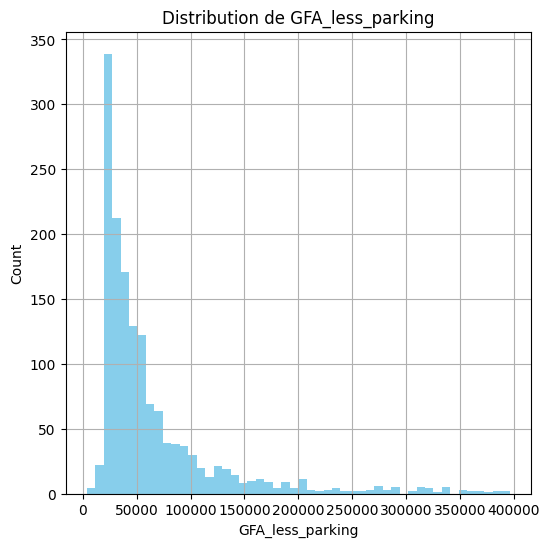

In [74]:
plt.figure(figsize=(6, 6))
plt.hist(df['GFA_less_parking'], bins=50, color='skyblue')
plt.xlabel('GFA_less_parking')
plt.ylabel('Count')
plt.title('Distribution de GFA_less_parking')
plt.grid()
plt.show()

In [76]:
df.PrimaryPropertyType.value_counts()

PrimaryPropertyType
Small- and Mid-Sized Office    290
Other                          221
Warehouse                      173
Large Office                   134
K-12 School                    125
Mixed Use Property             102
Retail Store                    79
Worship Facility                70
Hotel                           69
Distribution Center             45
Supermarket / Grocery Store     37
Medical Office                  35
Self-Storage Facility           28
Residence Hall                  17
Senior Care Community           17
University                      17
Restaurant                      11
Refrigerated Warehouse          11
Laboratory                       6
Office                           3
Low-Rise Multifamily             2
Hospital                         1
Name: count, dtype: int64

In [79]:
df.BuildingType.shape

(1493,)

In [81]:
df.PrimaryPropertyType.shape

(1493,)

In [83]:
print(df.columns.tolist())

['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'YearBuilt', 'NumberofBuildings', 'Latitude', 'Longitude', 'SiteEnergyUse(kBtu)', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'SiteEUI(kBtu/sf)', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'GFA_per_Floor', 'GFA_less_parking']


In [85]:
df.BuildingType.value_counts()

BuildingType
NonResidential        1325
SPS-District K-12       87
Nonresidential COS      80
Nonresidential WA        1
Name: count, dtype: int64

In [87]:
df.PrimaryPropertyType.value_counts()

PrimaryPropertyType
Small- and Mid-Sized Office    290
Other                          221
Warehouse                      173
Large Office                   134
K-12 School                    125
Mixed Use Property             102
Retail Store                    79
Worship Facility                70
Hotel                           69
Distribution Center             45
Supermarket / Grocery Store     37
Medical Office                  35
Self-Storage Facility           28
Residence Hall                  17
Senior Care Community           17
University                      17
Restaurant                      11
Refrigerated Warehouse          11
Laboratory                       6
Office                           3
Low-Rise Multifamily             2
Hospital                         1
Name: count, dtype: int64

In [89]:
df.LargestPropertyUseType.value_counts(dropna = False)

LargestPropertyUseType
Office                                                  455
Non-Refrigerated Warehouse                              185
K-12 School                                             125
Retail Store                                             85
Other                                                    83
Worship Facility                                         70
Hotel                                                    69
Distribution Center                                      46
Supermarket/Grocery Store                                39
Medical Office                                           37
Other - Recreation                                       30
Self-Storage Facility                                    27
Parking                                                  27
Other - Entertainment/Public Assembly                    18
Residence Hall/Dormitory                                 18
College/University                                       17
Senior Care Commu

In [91]:

df["LargestPropertyUseType"] = df["LargestPropertyUseType"].str.strip().str.lower()
df["SecondLargestPropertyUseType"] = df["SecondLargestPropertyUseType"].str.strip().str.lower()
df["ThirdLargestPropertyUseType"] = df["ThirdLargestPropertyUseType"].str.strip().str.lower()


# Exemple de regroupement manuel (à adapter)
map_groups = {
"hotel": "hospitality",
"restaurant": "hospitality",
"school": "education",
"university": "education"
}


df["LargestPropertyUseType"] = df["LargestPropertyUseType"].replace(map_groups)



# 4. Transformation en proportions de surface

df["TotalGFA"] = df[["LargestPropertyUseTypeGFA", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA"]].sum(axis=1)


# Calcul des proportions
df["LargestProp_share"] = df["LargestPropertyUseTypeGFA"] / df["TotalGFA"]
df["SecondProp_share"] = df["SecondLargestPropertyUseTypeGFA"] / df["TotalGFA"]
df["ThirdProp_share"] = df["ThirdLargestPropertyUseTypeGFA"] / df["TotalGFA"]



cat_cols = ['BuildingType', 'PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']
cat_gfa = pd.get_dummies(df[cat_cols], drop_first=True)
num_cols = ['YearBuilt', 'NumberofBuildings', 'Latitude', 'Longitude', 'NumberofFloors',
            'PropertyGFATotal', 'PropertyGFAParking', 'GFA_per_Floor', 'GFA_less_parking']
num_df = df[num_cols]  # extract numerical features
final_df = pd.concat([num_df, cat_gfa], axis=1)




In [93]:
from scipy.stats import skew
import numpy as np

# 1. Calcul de la skewness pour les variables numériques
skewness = final_df[num_cols].apply(lambda x: skew(x.dropna()))
print("Skewness des variables numériques :")
print(skewness.sort_values(ascending=False))

# 2. Détection des variables très asymétriques (skew > 1 ou < -1)
skewed_features = skewness[abs(skewness) > 1].index
print("\nVariables à transformer :", list(skewed_features))

# 3. Application d'une transformation log(1+x) uniquement si toutes les valeurs >= 0
for col in skewed_features:
    if (final_df[col] >= 0).all():
        final_df[col + "_log"] = np.log1p(final_df[col])

# 4. Vérification post-transformation
new_skewness = final_df[[col + "_log" for col in skewed_features if (final_df[col] >= 0).all()]].apply(
    lambda x: skew(x.dropna())
)

print("\nSkewness après transformation :")
print(new_skewness.sort_values(ascending=False))


Skewness des variables numériques :
NumberofBuildings     6.698957
PropertyGFAParking    5.195529
NumberofFloors        3.810299
PropertyGFATotal      2.714524
GFA_less_parking      2.639855
GFA_per_Floor         1.414670
Latitude              0.199252
Longitude            -0.120195
YearBuilt            -0.241742
dtype: float64

Variables à transformer : ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'GFA_per_Floor', 'GFA_less_parking']

Skewness après transformation :
PropertyGFAParking_log    1.561464
NumberofFloors_log        1.001090
PropertyGFATotal_log      0.863756
GFA_less_parking_log      0.765837
GFA_per_Floor_log         0.052621
NumberofBuildings_log    -0.108381
dtype: float64


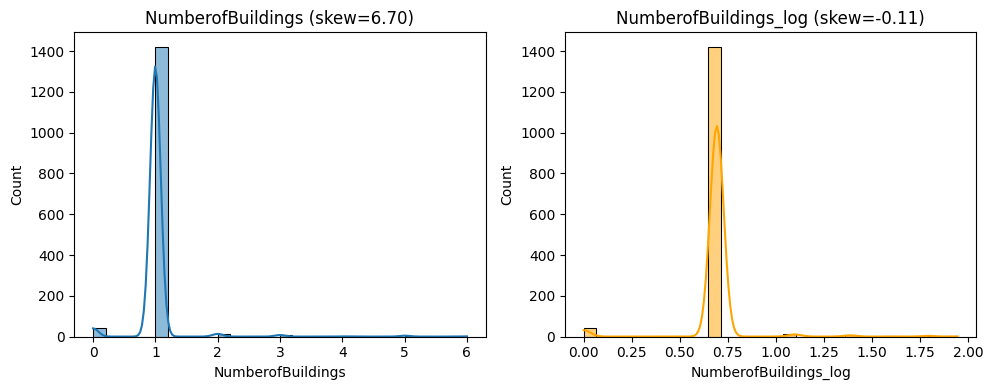

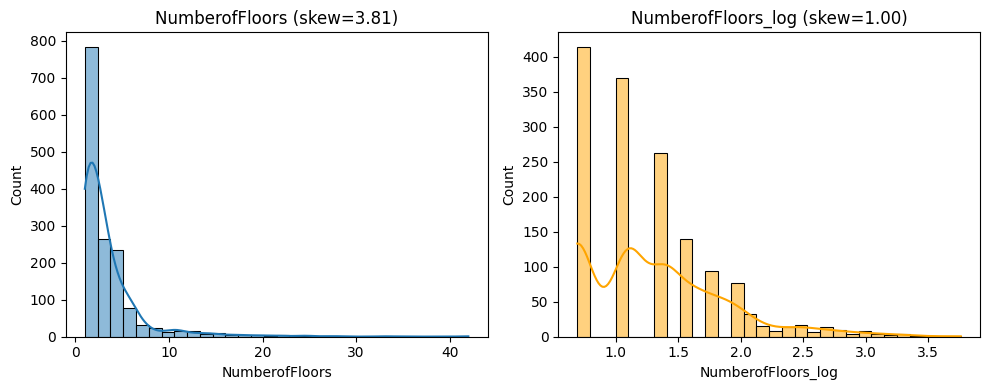

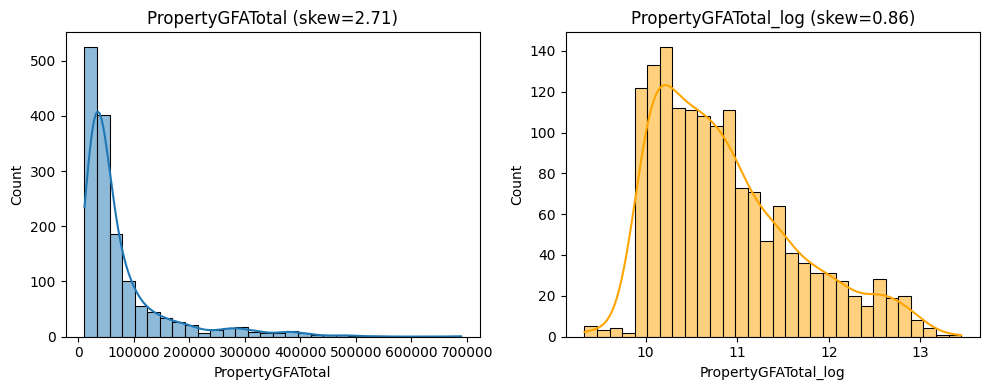

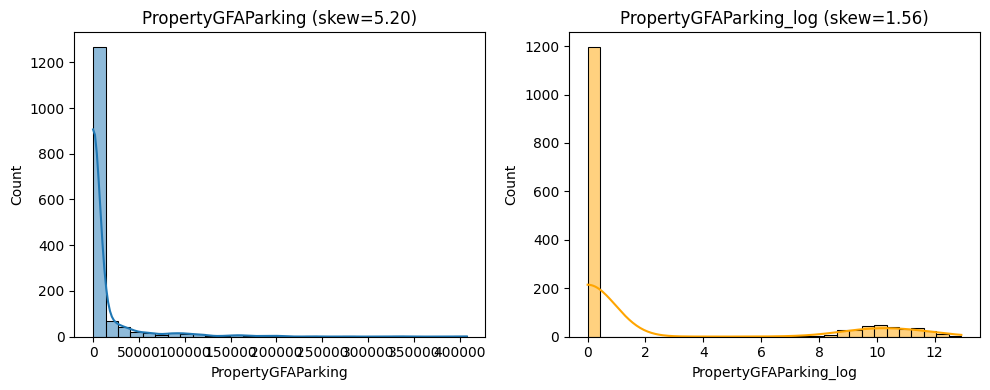

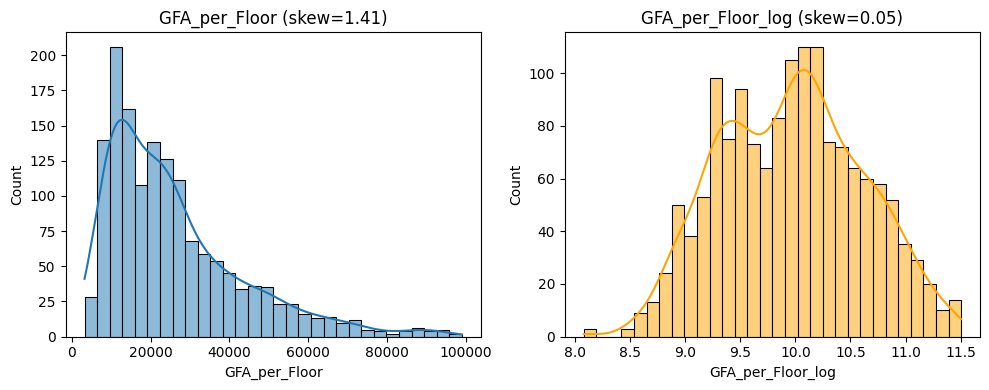

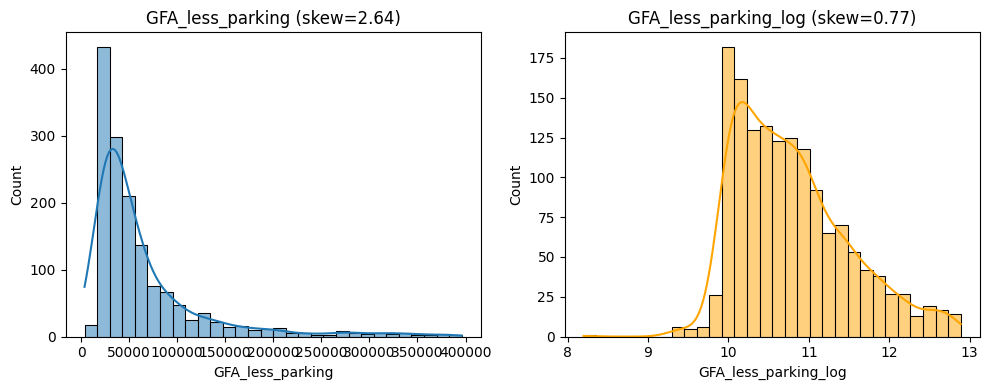

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# On trace les histogrammes pour chaque variable transformée
for col in skewed_features:
    if (final_df[col] >= 0).all():
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))

        # Avant transformation
        sns.histplot(final_df[col], kde=True, ax=axes[0], bins=30)
        axes[0].set_title(f"{col} (skew={skewness[col]:.2f})")

        # Après transformation log
        sns.histplot(final_df[col + "_log"], kde=True, ax=axes[1], bins=30, color="orange")
        axes[1].set_title(f"{col}_log (skew={new_skewness[col + '_log']:.2f})")

        plt.tight_layout()
        plt.show()


In [97]:
final_df.shape

(1493, 169)

In [99]:
final_df.head()

,YearBuilt,NumberofBuildings,Latitude,Longitude,NumberofFloors,PropertyGFATotal,PropertyGFAParking,GFA_per_Floor,GFA_less_parking,BuildingType_Nonresidential COS,...,ThirdLargestPropertyUseType_supermarket/grocery store,ThirdLargestPropertyUseType_swimming pool,ThirdLargestPropertyUseType_vocational school,ThirdLargestPropertyUseType_worship facility,NumberofBuildings_log,NumberofFloors_log,PropertyGFATotal_log,PropertyGFAParking_log,GFA_per_Floor_log,GFA_less_parking_log
0,1927,1.0,47.61220,-122.33799,12,88434,0,7369.500000,88434,False,...,False,False,False,False,0.693147,2.564949,11.390023,0.000000,8.905241,11.390023
1,1996,1.0,47.61317,-122.33393,11,103566,15064,9415.090909,88502,False,...,False,False,False,False,0.693147,2.484907,11.547974,9.620129,9.150175,11.390792
3,1926,1.0,47.61412,-122.33664,10,61320,0,6132.000000,61320,False,...,False,False,False,False,0.693147,2.397895,11.023878,0.000000,8.721439,11.023878
4,1980,1.0,47.61375,-122.34047,18,175580,62000,9754.444444,113580,False,...,False,True,False,False,0.693147,2.944439,12.075856,11.034906,9.185581,11.640272
5,1999,1.0,47.61623,-122.33657,2,97288,37198,48644.000000,60090,True,...,False,False,False,False,0.693147,1.098612,11.485441,10.524037,10.792304,11.003615


In [101]:
# Remplacer les NaN par la moyenne
X = final_df
X = X.fillna(X.mean(numeric_only=True))

# Variable cible
y = df['SiteEnergyUse(kBtu)'].copy()
y = y[X.index]

# # Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 3. Détection des features asymétriques (seulement sur train !)
# -------------------------------
skewness = X_train[num_cols].apply(lambda x: skew(x.dropna()))
skewed_features = skewness[abs(skewness) > 1].index
print("Variables à transformer :", list(skewed_features))

# -------------------------------
# 4. Transformation log(1+x) (on ajoute _log aux colonnes)
# -------------------------------
for col in skewed_features:
    if (X_train[col] >= 0).all():
        X_train[col + "_log"] = np.log1p(X_train[col])
        X_test[col + "_log"] = np.log1p(X_test[col])  # appliquer aussi sur test


Variables à transformer : ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'GFA_per_Floor', 'GFA_less_parking']


In [103]:
print(df.columns.tolist())

['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'YearBuilt', 'NumberofBuildings', 'Latitude', 'Longitude', 'SiteEnergyUse(kBtu)', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'SiteEUI(kBtu/sf)', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'GFA_per_Floor', 'GFA_less_parking', 'TotalGFA', 'LargestProp_share', 'SecondProp_share', 'ThirdProp_share']


In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [107]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train_scaled, y_train)
y_pred_dummy = dummy.predict(X_test_scaled)

print("DummyRegressor MSE:", mean_squared_error(y_test, y_pred_dummy))
print("DummyRegressor R2 :", r2_score(y_test, y_pred_dummy))

DummyRegressor MSE: 31229515448985.11
DummyRegressor R2 : -0.0009250348908194095


In [109]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Modèle Ridge
ridge = Ridge()

# Grille d'hyperparamètres à tester
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Recherche par validation croisée
grid_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train_scaled, y_train)

# Prédictions
y_pred_ridge = grid_ridge.predict(X_test_scaled)

# Résultats
from sklearn.metrics import mean_squared_error, r2_score
print("Ridge best alpha:", grid_ridge.best_params_['alpha'])
print("Ridge Test MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Test R²:", r2_score(y_test, y_pred_ridge))

Ridge best alpha: 100
Ridge Test MSE: 12790725288853.938
Ridge Test R²: 0.5900494461100878


In [112]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Définir le modèle Lasso
lasso = Lasso(max_iter=10000)  # augmenter max_iter si besoin

# Grille d'hyperparamètres à tester
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearchCV
grid_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train_scaled, y_train)

# Prédiction sur le test set
y_pred_lasso = grid_lasso.predict(X_test_scaled)

# Résultats
print("Lasso best alpha:", grid_lasso.best_params_['alpha'])
print("Lasso Test MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Test R²:", r2_score(y_test, y_pred_lasso))

Lasso best alpha: 1
Lasso Test MSE: 14769130629233.172
Lasso Test R²: 0.5266403471894825


In [113]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Définir ElasticNet
elastic = ElasticNet(max_iter=10000)

# Grille de recherche
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9, 1]
}

# GridSearchCV
grid_elastic = GridSearchCV(elastic, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_elastic.fit(X_train_scaled, y_train)

# Prédictions
y_pred_elastic = grid_elastic.predict(X_test_scaled)

# Résultats
print("ElasticNet best params:", grid_elastic.best_params_)
print("ElasticNet Test MSE:", mean_squared_error(y_test, y_pred_elastic))
print("ElasticNet Test R²:", r2_score(y_test, y_pred_elastic))

ElasticNet best params: {'alpha': 1, 'l1_ratio': 0.5}
ElasticNet Test MSE: 11736267784512.123
ElasticNet Test R²: 0.6238454528412303


In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Définir le modèle
rf = RandomForestRegressor(random_state=42)

# Grille de recherche
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# GridSearchCV
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)  # Pas besoin de scaler !

# Prédictions
y_pred_rf = grid_rf.predict(X_test)

# Résultats
print("RandomForest best params:", grid_rf.best_params_)
print("RandomForest Test MSE:", mean_squared_error(y_test, y_pred_rf))
print("RandomForest Test R²:", r2_score(y_test, y_pred_rf))


RandomForest best params: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 300}
RandomForest Test MSE: 15025174999145.031
RandomForest Test R²: 0.5184339688258389


In [115]:
def evaluate_model(name, model, X_train_scaled, y_train, X_test_scaled, y_test, results):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # results.append((name, model, mse, r2))
    results.append({
        "name": name,
        "model": model,
        "mse": mse,
        "r2": r2
    })
    print(f"{name}: MSE={mse:.2f}, R2={r2:.2f}")


In [116]:
results = []
evaluate_model("Ridge", grid_ridge.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test, results)
evaluate_model("Lasso", grid_lasso.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test, results)
evaluate_model("ElasticNet", grid_elastic.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test, results)
evaluate_model("RandomForest", grid_rf.best_estimator_, X_train, y_train, X_test, y_test, results)


Ridge: MSE=12790725288853.94, R2=0.59
Lasso: MSE=14769130629233.17, R2=0.53
ElasticNet: MSE=11736267784512.12, R2=0.62
RandomForest: MSE=15025174999145.03, R2=0.52


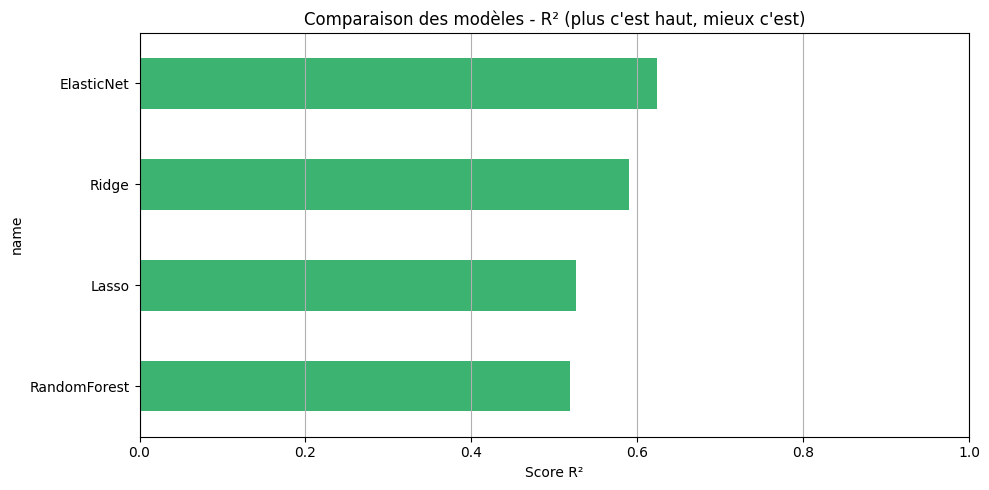

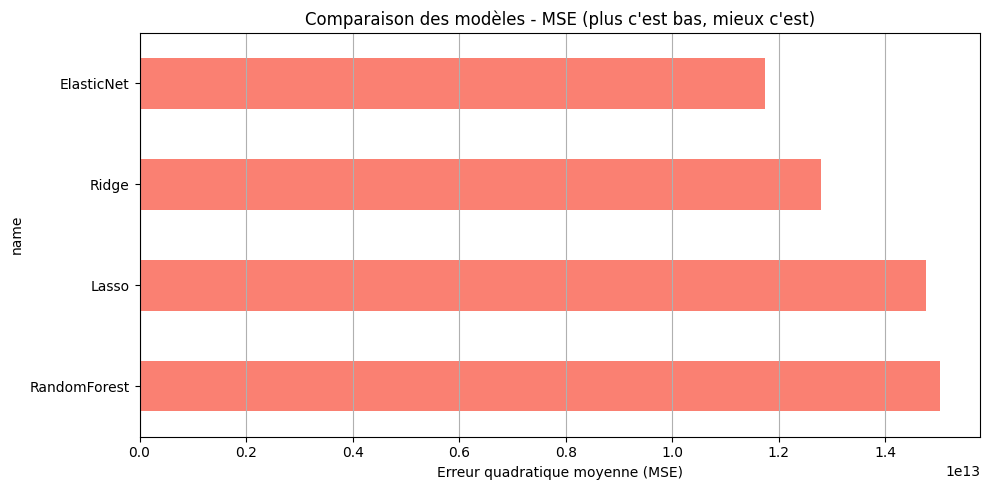

In [117]:
# df_results = pd.DataFrame(results).T.sort_values(by='R²', ascending=True)
# df_results = pd.DataFrame(results)[["name", "mse", "r2"]].sort_values(by="r2", ascending=True)

df_results = pd.DataFrame(results).sort_values(by="r2", ascending=True)
# Tracer le R²
plt.figure(figsize=(10, 5))
# df_results['r2'].plot(kind='barh', color='mediumseagreen')
df_results.set_index("name")["r2"].plot(kind="barh", color="mediumseagreen")
plt.title("Comparaison des modèles - R² (plus c'est haut, mieux c'est)")
plt.xlabel("Score R²")
plt.xlim(0, 1)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Tracer le MSE
plt.figure(figsize=(10, 5))
# df_results['mse'].plot(kind='barh', color='salmon')
df_results.set_index("name")["mse"].plot(kind="barh", color="salmon")
plt.title("Comparaison des modèles - MSE (plus c'est bas, mieux c'est)")
plt.xlabel("Erreur quadratique moyenne (MSE)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [118]:
print(final_df.columns.tolist())

['YearBuilt', 'NumberofBuildings', 'Latitude', 'Longitude', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'GFA_per_Floor', 'GFA_less_parking', 'BuildingType_Nonresidential COS', 'BuildingType_Nonresidential WA', 'BuildingType_SPS-District K-12', 'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel', 'PrimaryPropertyType_K-12 School', 'PrimaryPropertyType_Laboratory', 'PrimaryPropertyType_Large Office', 'PrimaryPropertyType_Low-Rise Multifamily', 'PrimaryPropertyType_Medical Office', 'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office', 'PrimaryPropertyType_Other', 'PrimaryPropertyType_Refrigerated Warehouse', 'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant', 'PrimaryPropertyType_Retail Store', 'PrimaryPropertyType_Self-Storage Facility', 'PrimaryPropertyType_Senior Care Community', 'PrimaryPropertyType_Small- and Mid-Sized Office', 'PrimaryPropertyType_Supermarket / Grocery Store', 'PrimaryPropertyType_University', 'PrimaryPro

In [142]:
print(df.columns.tolist())

['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType', 'YearBuilt', 'NumberofBuildings', 'Latitude', 'Longitude', 'SiteEnergyUse(kBtu)', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'SiteEUI(kBtu/sf)', 'TotalGHGEmissions', 'GHGEmissionsIntensity', 'GFA_per_Floor', 'GFA_less_parking', 'TotalGFA', 'LargestProp_share', 'SecondProp_share', 'ThirdProp_share']


In [119]:
# Remplacer les NaN par la moyenne
X = final_df
X = X.fillna(X.mean(numeric_only=True))

# Variable cible
y = df['TotalGHGEmissions'].copy()
y = y[X.index]

# # Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 3. Détection des features asymétriques (seulement sur train !)
# -------------------------------
skewness = X_train[num_cols].apply(lambda x: skew(x.dropna()))
skewed_features = skewness[abs(skewness) > 1].index
print("Variables à transformer :", list(skewed_features))

# -------------------------------
# 4. Transformation log(1+x) (on ajoute _log aux colonnes)
# -------------------------------
for col in skewed_features:
    if (X_train[col] >= 0).all():
        X_train[col + "_log"] = np.log1p(X_train[col])
        X_test[col + "_log"] = np.log1p(X_test[col])  # appliquer aussi sur test

Variables à transformer : ['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'GFA_per_Floor', 'GFA_less_parking']


In [120]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [121]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train_scaled, y_train)
y_pred_dummy = dummy.predict(X_test_scaled)

print("DummyRegressor MSE:", mean_squared_error(y_test, y_pred_dummy))
print("DummyRegressor R2 :", r2_score(y_test, y_pred_dummy))

DummyRegressor MSE: 18595.612813738022
DummyRegressor R2 : -0.001130792328721153


In [122]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
# Modèle Ridge
ridge = Ridge()

# Grille d'hyperparamètres à tester
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Recherche par validation croisée
grid_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train_scaled, y_train)

# Prédictions
y_pred_ridge = grid_ridge.predict(X_test_scaled)

# Résultats
from sklearn.metrics import mean_squared_error, r2_score
print("Ridge best alpha:", grid_ridge.best_params_['alpha'])
print("Ridge Test MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Test R²:", r2_score(y_test, y_pred_ridge))

Ridge best alpha: 100
Ridge Test MSE: 12376.245432504946
Ridge Test R²: 0.3337008831058924


In [123]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Définir le modèle Lasso
lasso = Lasso(max_iter=10000)  # augmenter max_iter si besoin

# Grille d'hyperparamètres à tester
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearchCV
grid_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train_scaled, y_train)

# Prédiction sur le test set
y_pred_lasso = grid_lasso.predict(X_test_scaled)

# Résultats
print("Lasso best alpha:", grid_lasso.best_params_['alpha'])
print("Lasso Test MSE:", mean_squared_error(y_test, y_pred_lasso))
print("Lasso Test R²:", r2_score(y_test, y_pred_lasso))

Lasso best alpha: 1
Lasso Test MSE: 12468.444585760024
Lasso Test R²: 0.3287371633148404


In [124]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Définir ElasticNet
elastic = ElasticNet(max_iter=10000)

# Grille de recherche
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9, 1]
}

# GridSearchCV
grid_elastic = GridSearchCV(elastic, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_elastic.fit(X_train_scaled, y_train)

# Prédictions
y_pred_elastic = grid_elastic.predict(X_test_scaled)

# Résultats
print("ElasticNet best params:", grid_elastic.best_params_)
print("ElasticNet Test MSE:", mean_squared_error(y_test, y_pred_elastic))
print("ElasticNet Test R²:", r2_score(y_test, y_pred_elastic))

ElasticNet best params: {'alpha': 1, 'l1_ratio': 0.9}
ElasticNet Test MSE: 12419.844833439478
ElasticNet Test R²: 0.33135362500583143


In [125]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Définir le modèle
rf = RandomForestRegressor(random_state=42)

# Grille de recherche
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# GridSearchCV
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)  # Pas besoin de scaler !

# Prédictions
y_pred_rf = grid_rf.predict(X_test)

# Résultats
print("RandomForest best params:", grid_rf.best_params_)
print("RandomForest Test MSE:", mean_squared_error(y_test, y_pred_rf))
print("RandomForest Test R²:", r2_score(y_test, y_pred_rf))


RandomForest best params: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
RandomForest Test MSE: 12594.682484071154
RandomForest Test R²: 0.32194090182972446


In [126]:
def evaluate_model(name, model, X_train_scaled, y_train, X_test_scaled, y_test, results):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # results.append((name, model, mse, r2))
    results.append({
        "name": name,
        "model": model,
        "mse": mse,
        "r2": r2
    })
    print(f"{name}: MSE={mse:.2f}, R2={r2:.2f}")


In [127]:
results = []
evaluate_model("Ridge", grid_ridge.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test, results)
evaluate_model("Lasso", grid_lasso.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test, results)
evaluate_model("ElasticNet", grid_elastic.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test, results)
evaluate_model("RandomForest", grid_rf.best_estimator_, X_train, y_train, X_test, y_test, results)


Ridge: MSE=12376.25, R2=0.33
Lasso: MSE=12468.44, R2=0.33
ElasticNet: MSE=12419.84, R2=0.33
RandomForest: MSE=12594.68, R2=0.32


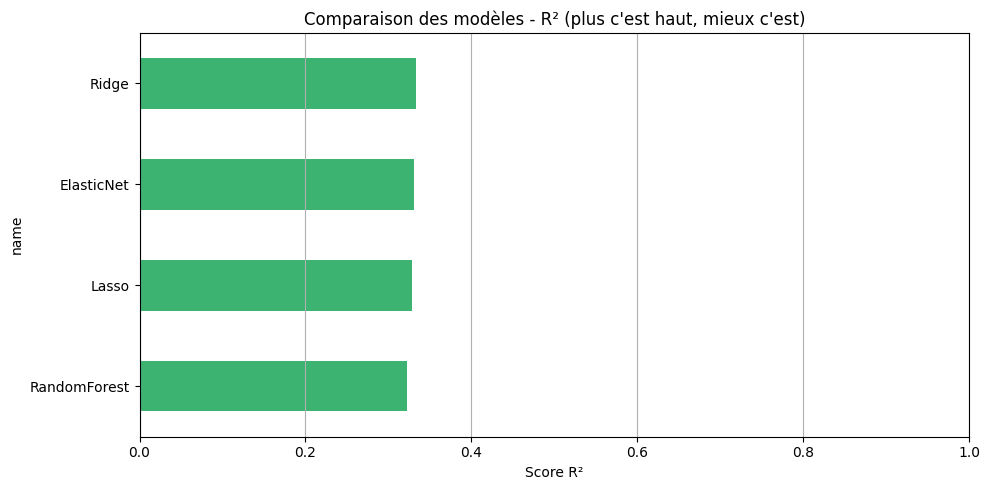

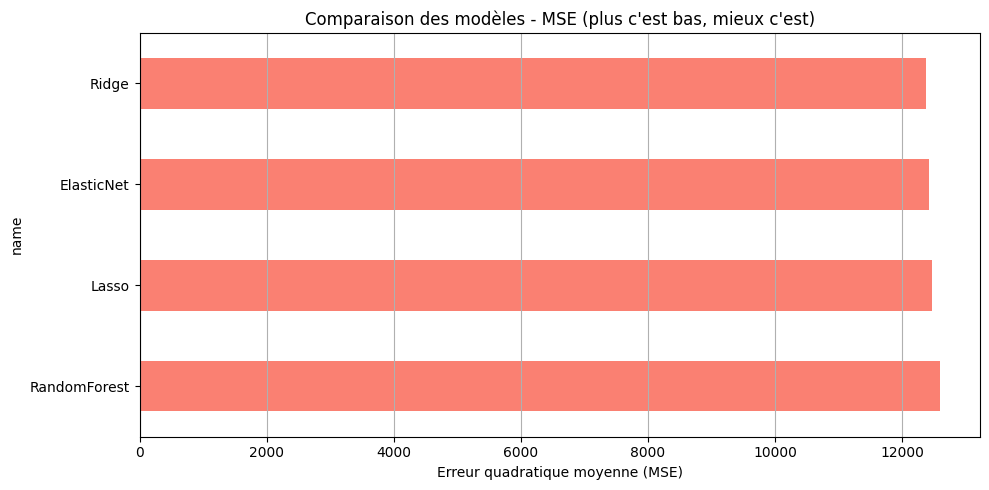

In [128]:
# df_results = pd.DataFrame(results).T.sort_values(by='R²', ascending=True)
# df_results = pd.DataFrame(results)[["name", "mse", "r2"]].sort_values(by="r2", ascending=True)

df_results = pd.DataFrame(results).sort_values(by="r2", ascending=True)
# Tracer le R²
plt.figure(figsize=(10, 5))
# df_results['r2'].plot(kind='barh', color='mediumseagreen')
df_results.set_index("name")["r2"].plot(kind="barh", color="mediumseagreen")
plt.title("Comparaison des modèles - R² (plus c'est haut, mieux c'est)")
plt.xlabel("Score R²")
plt.xlim(0, 1)
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# Tracer le MSE
plt.figure(figsize=(10, 5))
# df_results['mse'].plot(kind='barh', color='salmon')
df_results.set_index("name")["mse"].plot(kind="barh", color="salmon")
plt.title("Comparaison des modèles - MSE (plus c'est bas, mieux c'est)")
plt.xlabel("Erreur quadratique moyenne (MSE)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [129]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE